### GREEDY , DP , KRUSKAL

Already available test files:
test10.tsv

test160.tsv

test20.tsv

test40.tsv

test5.tsv

test80.tsv

with_time

Which test data do you want? type k , for k = num of points : 160
Number of points visited : 160
Total distance covered is :10.8312072381696
Path is [0, 3, 111, 145, 139, 125, 91, 71, 37, 138, 41, 155, 63, 146, 50, 157, 14, 102, 6, 121, 42, 46, 55, 147, 44, 66, 143, 108, 26, 9, 47, 56, 105, 151, 10, 18, 79, 129, 120, 4, 133, 124, 94, 22, 17, 144, 114, 61, 95, 131, 135, 73, 101, 52, 65, 28, 8, 31, 149, 107, 74, 117, 154, 150, 2, 86, 13, 130, 90, 81, 39, 29, 68, 67, 78, 45, 70, 49, 83, 30, 88, 128, 58, 72, 123, 5, 12, 25, 99, 97, 112, 152, 43, 156, 80, 87, 132, 142, 159, 53, 136, 82, 127, 7, 103, 109, 106, 51, 23, 21, 32, 110, 158, 104, 93, 96, 76, 100, 75, 89, 77, 48, 40, 64, 27, 115, 85, 69, 92, 153, 126, 19, 35, 141, 122, 11, 34, 38, 116, 118, 16, 15, 148, 62, 59, 137, 134, 36, 20, 54, 119, 57, 24, 33, 84, 113, 1, 98, 140, 60]
Total points is: 824.4298179666756
Total time t

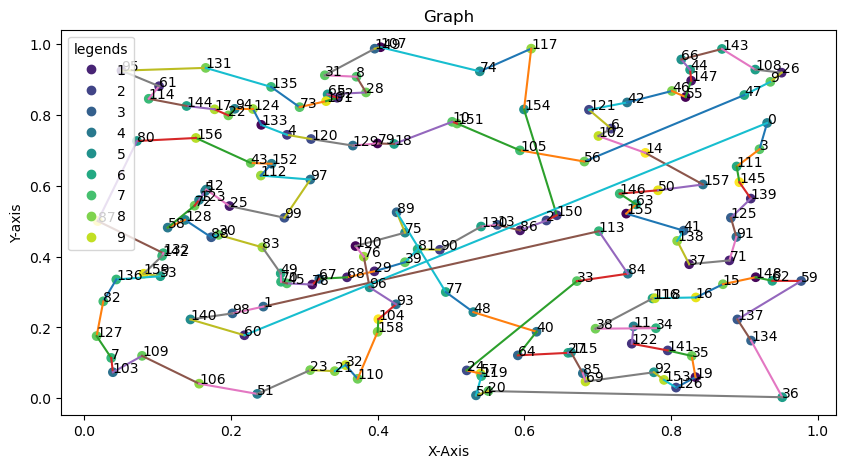

In [2]:
import math
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random
import os 
from multiprocessing import Pool


def create_instance(num_points):
    op_dataset = []
    for i in range(num_points):
        op_dataset.append((random.random(),random.random(),random.random()*10))             # saving x coordinate , y coordinate , points
    
    return(op_dataset)

def get_data():
    path = "samples"
    filenames = os.listdir(path)
    print("Already available test files:")
    for filename in filenames:
        print(filename+"\n")
    k = int(input("Which test data do you want? type k , for k = num of points : "))
    file_path = "samples/test"+str(k)+".tsv"
    data_points =[]
    with open(file_path,"r") as file:
        lines = file.readlines()
        for line in lines:
            xcor,ycor,points = map(float,line.split())
            data_points.append((xcor,ycor,points))
    return(data_points)

def euc_dist(x1,y1,x2,y2):
    dist = np.sqrt((x1-x2)**2 +(y1-y2)**2)
    return(dist)

def find_parent(node):
        if parent[node] == node:
            return node
        parent[node] = find_parent(parent[node])
        return parent[node]



class Op_basic:
    def __init__(self,num_points,data,constraint_d):
        self.num_points = num_points
        self.data = data
        self.constraint_d = constraint_d
        self.edge_matrix = self.dist_matrix()
    
    def save(self):
        file_path = "samples/test"+self.num_points +".tsv"
        with open(file_path,"w+") as file:
            for i in range(self.num_points):
                file.write(str(self.data[i][0])+"\t"+str(self.data[i][1])+"\t"+str(self.data[i][2])+"\n")
        print("File Has been written!")
        
    

    def dist_matrix(self):
        n = self.num_points
        dist_matrix = [[0]*n for _ in range(n)]
        for i in range(n):
            for j in range(i+1,n):
                dist = euc_dist(self.data[i][0],self.data[i][1],self.data[j][0],self.data[j][1])
                dist_matrix[i][j]=dist
                dist_matrix[j][i]= dist
        return(dist_matrix)
    
    def plot(self,path):
        x = []
        y = []
        p = []

        for i in range(self.num_points):
            x.append(float(self.data[i][0]))
            y.append(float(self.data[i][1]))
            p.append(float(self.data[i][2]))

        fig,ax = plt.subplots(figsize=(10,5))
        abc = ax.scatter(x=x,y=y,c=p)
        ax.set(xlabel="X-Axis",ylabel="Y-axis",title="Graph")
        ax.legend(*abc.legend_elements(),title="legends")
        for i in range(self.num_points):
            plt.text(x[i],y[i],str(i))
        for i in range(len(path)-1):
            plt.plot([x[path[i]],x[path[i+1]]],[y[path[i]],y[path[i+1]]])
        plt.plot([x[0],x[path[-1]]],[y[0],y[path[-1]]])
        
    
    def greedySoln1(self):          # keep distance minimum
        n = self.num_points
        d = self.edge_matrix
        p =[0]
        dist_covered = 0
        tot_points = self.data[0][2]
        visited =[False] * n
        visited[0]= True
        dmax = self.constraint_d
        while dist_covered < dmax:
            dist_left = dmax - dist_covered
            min_d = float('inf')
            min_ind = None

            for i in range(n):
                if not visited[i] and dist_left >= d[p[-1]][i]:
                    if d[p[-1]][i] < min_d:
                        min_d = d[p[-1]][i]
                        min_ind = i

            if min_ind is None : 
                break

            p.append(min_ind)
            dist_covered +=min_d
            tot_points += self.data[min_ind][2]
           # print(f"Points added : {self.data[min_ind][2]}")
            visited[min_ind]=True
        print(f"Number of points visited : {len(p)}")
        print(f"Total distance covered is :{dist_covered}")
        print(f"Path is {p}")
        print(f"Total points is: {tot_points}")
        self.plot(p)
        
    def greedySoln2(self):        ## Maxing Points
        n = self.num_points
        d = self.edge_matrix
        p =[0]
        dist_covered = 0
        tot_points = self.data[0][2]
        visited =[False] * n
        visited[0]= True
        dmax = self.constraint_d
        sorted_points = sorted(self.data, key=lambda x: x[2], reverse=True)
        while dist_covered < dmax:
            dist_left = dmax - dist_covered
            max_score = float('-inf')
            min_ind = None

            for i in range(n):
                if not visited[i] and dist_left >= d[p[-1]][i]:
                    if sorted_points[i][2] > max_score:
                        max_score = sorted_points[i][2]
                        min_ind = i

            if min_ind is None : 
                break

            p.append(min_ind)
            dist_covered +=d[p[-2]][min_ind]
            tot_points += self.data[min_ind][2]
           # print(f"Points added : {self.data[min_ind][2]}")
            visited[min_ind]=True
        print(f"Number of points visited : {len(p)}")
        print(f"Total distance covered is :{dist_covered}")
        print(f"Path is {p}")
        print(f"Total points is: {tot_points}")
        self.plot(p)
        
    def greedySoln3(self):
        n = self.num_points
        d = self.edge_matrix
        p =[0]
        dist_covered = 0
        tot_points = self.data[0][2]
        visited =[False] * n
        visited[0]= True
        dmax = self.constraint_d
        
        ratio_values = [self.data[i][2] /d[0][i] for i in range(1,n)]
        print(ratio_values)
        
        while dist_covered < dmax:
            dis_left = dmax - dist_covered
            max_ratio = 0
            max_index = None
            
            for i in range(1,n):
                if not visited[i] and dis_left >= d[p[-1]][i]:
                    if ratio_values[i-1] > max_ratio:
                        max_ratio = ratio_values[i-1]
                        max_index =i
            
            if max_index is None:
                break
                
            p.append(max_index)
            #ratio_values = [self.data[i][2]/d[p[-1]][i] for i in range(1,n) if i!=p[-1]]
            dist_covered += d[p[-2]][max_index]
            tot_points += self.data[max_index][2]
            visited[max_index] = True
        
        
        print(f"Path is {p}")
        print(f"Number of points covered is {len(p)}")
        print(f"Total distance covered is {dist_covered}")
        print(f"Total points is {tot_points}")
        self.plot(p)
        
        
    def dpSoln(self):
        n = self.num_points
        d = self.edge_matrix
        print(d)
        tot_points = self.data[0][2]
        visited =[False] * n
        visited[0]= True
        dmax = self.constraint_d
        
        dp = [[0]*(dmax +1) for _ in range(n)]
        prev = [[None]*(dmax +1) for _ in range(n)]
        
        for t in range(1, dmax+1):
            for j in range(1,n):
                dp[j][t] = float('-inf')
                for i in range(j):
                    if t >= d[i][j]:
                        profit = self.data[j][2] if t >= d[i][j] else 0
                        if dp[i][t - int(d[i][j])] + profit> dp[j][t]:
                            dp[j][t] = dp[i][t - int(d[i][j])] + profit
                            prev[j][t] =i
                            
                            
        p = []
        j = n-1
        t = dmax
        
        while j is not None:
            p.append(j)
            i = prev[j][t]
            if i is not None:
                t -= int(d[i][j])
            j =i
            
        p.reverse()
        
        print(f"Total number of data points :{len(p)}")
        print(f"The path is {p}")
        print(f"Total points is {dp[n-1][dmax]+ self.data[0][2]}")
        self.plot(p)
        
        
    def maxSpanningTreeSoln1(self):   # greedy
        n = self.num_points
        d = self.edge_matrix
        p = [0]  # Start with the first node
        visited = [False] * n
        visited[0] = True
        tot_points = 0
        dmax = self.constraint_d

        while len(p) < n:    #add constraint too!  
            max_score = float('-inf')
            max_index = None

            for i in range(n):
                if not visited[i]:
                    for j in p:
                        score = self.data[i][2] / d[i][j]
                        if score > max_score:
                            max_score = score
                            max_index = i

            if max_index is None:
                break

            p.append(max_index)
            tot_points += self.data[max_index][2]
            visited[max_index] = True

        # Connect the last node to the first node
        p.append(0)
        tot_points += self.data[0][2]

        print(f"Path is {p}")
        print(f"Number of points covered is {len(p) -1 }")
        print(f"Total points is {tot_points}")
        self.plot(p)
        
        
    def maxSpanningTreeKruskal(self):
        n = self.num_points
        d = self.edge_matrix
        edges = []  # Store edges as tuples (i, j, weight)
        for i in range(n):
            for j in range(i + 1, n):
                edges.append((i, j, d[i][j] / self.data[j][2]))  # Use the inverse of the ratio as weight

        edges.sort(key=lambda x: x[2], reverse=True)  # Sort edges in non-increasing order of weights

        parent = [i for i in range(n)]

        def find_parent(node):
            if parent[node] == node:
                return node
            parent[node] = find_parent(parent[node])
            return parent[node]

        def union(u, v):
            parent_u = find_parent(u)
            parent_v = find_parent(v)
            parent[parent_u] = parent_v

        def has_cycle(u, v):
            return find_parent(u) == find_parent(v)

        max_spanning_tree = []

        while len(max_spanning_tree) < n - 1:            ## implement constraint
            i, j, weight = edges.pop(0)
            if not has_cycle(i, j):
                max_spanning_tree.append((i, j))
                union(i, j)

        # Construct the final path from the spanning tree
        start_node = 0
        path = [start_node]
        visited = [False] * n
        visited[start_node] = True

        def dfs(node):
            for edge in max_spanning_tree:
                if edge[0] == node and not visited[edge[1]]:
                    visited[edge[1]] = True
                    path.append(edge[1])
                    dfs(edge[1])
                elif edge[1] == node and not visited[edge[0]]:
                    visited[edge[0]] = True
                    path.append(edge[0])
                    dfs(edge[0])

        dfs(start_node)

        # Connect the last node to the first node
        path.append(start_node)

        print(f"Path is {path}")
        print(f"Number of points covered is {len(path)}")
        total_points = sum(self.data[node][2] for node in path) - self.data[0][2]
        print(f"Total points is {total_points}")
        self.plot(path)
    
    def cycle_length(self, cycle):
        length = 0
        i = 0
        while i < len(cycle) -1:
            length += self.edge_matrix[cycle[i]][cycle[i+1]]
            i+=1
        length+= self.edge_matrix[cycle[i]][cycle[0]]
        return length

    def add_artificial_good_cycle(self):
        size = self.num_points

        for i in range(size-1):
            self.edge_matrix[i][i+1]/=10
        self.edge_matrix[size-1][0]/=10
        
    
    def traverse_graph(self, source_node, intensity, dmax):
        visited = np.asarray([1 for _ in range(self.num_points)])
        visited[source_node] = 0
        cycle = [source_node]
        steps = 0
        current = source_node
        total_length = 0
        dist_covered = 0  # Initialize total distance covered
        while steps < self.num_points - 1 and dist_covered < dmax:
            jumps_neighbors = []
            jumps_values = []
            for node in range(self.num_points):
                if visited[node] != 0:
                    sediment = max(intensity[current][node], 1e-5)
                    v = (sediment ** 0.9) / (self.edge_matrix[current][node] ** 1.5)
                    jumps_neighbors.append(node)
                    jumps_values.append(v)

            next_node = random.choices(jumps_neighbors, weights=jumps_values)[0]
            visited[next_node] = 0
            dist_covered += self.edge_matrix[current][next_node]  # Update total distance covered
            current = next_node
            cycle.append(current)
            steps += 1

        total_length = self.cycle_length(cycle)
       # print(f"Total dist covered:{dist_covered}")
        assert len(list(set(cycle))) == len(cycle)
        return cycle, total_length
    
    def break_most_traversed_edge(self,intensity, constant):
        index = intensity.argmax()
        index = np.unravel_index(index, g.intensity.shape)
        self.edge_matrix[index]*=constant
        return index # for logging purposes   
    
    def ant_colony_optimisation(self, verbose=True, iterations = 100, 
                                ants_per_iteration = 500, q = None, degradation_factor = .9, 
                                use_inertia = False, run_experiment_break=False, 
                                run_experiment_artificial_good_cycle=False,default_pheromone_level = None):
       # random.seed(100)    ## random creates diff result at diff times
        n = self.num_points
        d = np.array(self.edge_matrix)
        dist_covered = 0
        total_points = 0
        visited = [False] * n
        visited[0] = True
        dmax = self.constraint_d
        total_ants = 0
        if q is None:
            q = d.mean()
        if default_pheromone_level:
            intensity = np.full_like(d, default_pheromone_level).astype('float64')
        else:
            intensity = np.full_like(d, d.mean()*10).astype('float64')
        
        best_cycle = None
        best_length = float("inf")
        old_best = None
        inertia = 0
        patience = 100
        index = None
        if run_experiment_break or run_experiment_artificial_good_cycle:
            pheromone_history = []
            
        for iteration in range(iterations):
            print(f"iteration:{iteration} \n" if (verbose and iteration%50==0) else '', end='')
            print(f"best weight so far: {round(best_length,2)}\n" if (verbose and iteration%50==0) else '', end='')
            print(f"average intensity {intensity.mean()}\n" if (verbose and iteration%50==0) else '', end='')
            
            
            if iteration == 500:
                if run_experiment_artificial_good_cycle:
                    add_artificial_good_cycle(self)
                if run_experiment_break:
                    index = self.break_most_traversed_edge(intensity,10)    ## check this 
            if iteration >= 500:
                if add_artificial_good_cycle:
                    levels = []
                    size = n
                    for i in range(size-1):
                        levels.append(intensity[i][i+1])
                    levels.append(intensity[size-1][0])
                    pheromone_history.append(levels)

                if run_experiment_break:
                    pheromone_history.append(intensity[index])
                    
            cycles = [self.traverse_graph(random.randint(0,n-1),intensity,dmax) for _ in range(ants_per_iteration)] ## check this
            cycles.sort(key = lambda x: x[1])
            cycles = cycles[: ants_per_iteration//2]
            total_ants+=ants_per_iteration

            if best_cycle: #elitism
                cycles.append((best_cycle, best_length))

                if use_inertia:
                    old_best = best_length
                    
                

            for cycle, total_length in cycles:

                total_length = self.cycle_length(cycle)
                #print(total_length)
                if total_length < best_length and cycle[0]==0:
                    best_length = total_length
                    best_cycle = cycle

                delta = q/total_length
                i = 0
                while i < len(cycle) -1:
                    intensity[cycle[i]][cycle[i+1]]+= delta
                    i+=1
                intensity[cycle[i]][0] += delta
                intensity *= degradation_factor


            if use_inertia and best_cycle:

                if old_best == best_length:
                        inertia+=1
                else:
                    inertia = 0

                if inertia > patience:
                    print('applying shake')
                    intensity += intensity.mean()

        p=best_cycle
        d_c=0
        for i in p:
            total_points+=self.data[i][2]
        p.append(p[0])
        print(p)
        print(f"Total points :{total_points}")
        self.plot(p)
        
        
        
        
        
        
    
        
        




    
def main():
    data = get_data()
    op1 = Op_basic(len(data),data,20)
    #print(op1.distance_matrix)
    startTime = timeit.default_timer()
    op1.greedySoln1()
   # op1.ant_colony_optimisation()
    stopTime = timeit.default_timer()
    print(f"Total time taken is {stopTime - startTime}")
   # op1.plot()

# next work : https://github.com/maoaiz/tsp-genetic-python/blob/master/tsp-genetic-python.py
    

    

if __name__ == "__main__":
    main()

        


### Christofedes Algorithm

Orienteering Tour: [0, 4, 3, 0]
Total Profit: 15.334007366594095


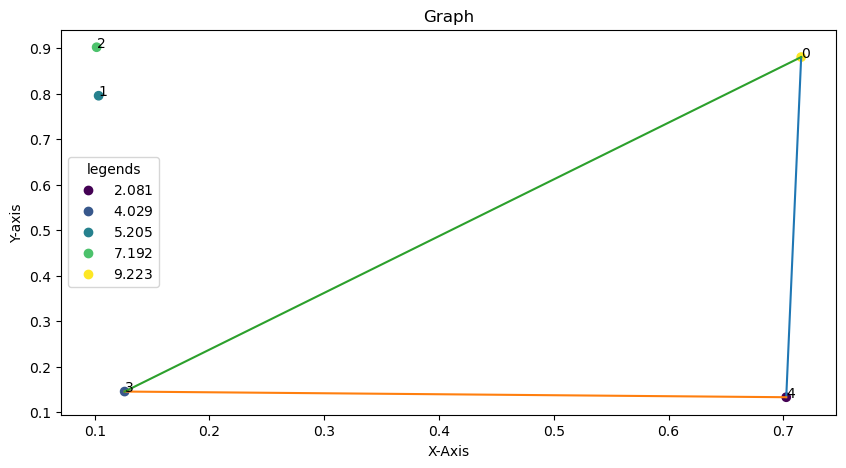

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import pdist, squareform

class OrienteeringSolver:
    def __init__(self, points, Tmax):
        self.points = points
        self.Tmax = Tmax
        self.num_points = len(points)
        self.dist_matrix = squareform(pdist(points[:, :2]))

    def euclidean_distance(self, i, j):
        return np.linalg.norm(self.points[i, :2] - self.points[j, :2])
    
    def plot(self,path):
        x = []
        y = []
        p = []

        for i in range(self.num_points):
            x.append(float(points[i][0]))
            y.append(float(points[i][1]))
            p.append(float(points[i][2]))

        fig,ax = plt.subplots(figsize=(10,5))
        abc = ax.scatter(x=x,y=y,c=p)
        ax.set(xlabel="X-Axis",ylabel="Y-axis",title="Graph")
        ax.legend(*abc.legend_elements(),title="legends")
        for i in range(self.num_points):
            plt.text(x[i],y[i],str(i))
        for i in range(len(path)-1):
            plt.plot([x[path[i]],x[path[i+1]]],[y[path[i]],y[path[i+1]]])
        plt.plot([x[0],x[path[-1]]],[y[0],y[path[-1]]])

    def minimum_spanning_tree(self):
        G = nx.Graph()
        for i in range(self.num_points):
            for j in range(i + 1, self.num_points):
                G.add_edge(i, j, weight=self.euclidean_distance(i, j))
        return nx.minimum_spanning_tree(G)

    def minimum_weight_perfect_matching(self, odd_vertices):
        G = nx.Graph()
        for i in range(len(odd_vertices)):
            for j in range(i + 1, len(odd_vertices)):
                u, v = odd_vertices[i], odd_vertices[j]
                G.add_edge(u, v, weight=self.euclidean_distance(u, v))

        return nx.max_weight_matching(G, weight='weight')

    def orienteering_tour(self):
        # Minimum Spanning Tree
        mst = self.minimum_spanning_tree()

        # Find odd-degree vertices in the MST
        odd_vertices = [v for v, degree in mst.degree() if degree % 2 != 0]

        # Minimum Weight Perfect Matching on odd-degree vertices
        matching = self.minimum_weight_perfect_matching(odd_vertices)

        # Combine edges from MST and matching
        tour_edges = set(mst.edges) | set(matching)

        # Eulerian circuit on the multigraph
        euler_tour = list(nx.eulerian_circuit(nx.MultiGraph(tour_edges)))

        # Create the final orienteering tour with Tmax constraint
        orienteering_tour = []
        visited = set()
        accumulated_distance = 0

        for u, v in euler_tour:
            if u not in visited:
                if accumulated_distance + self.euclidean_distance(u, v) <= self.Tmax:
                    orienteering_tour.append(u)
                    accumulated_distance += self.euclidean_distance(u, v)
                    visited.add(u)

        orienteering_tour.append(orienteering_tour[0])  # Return to the starting point
        self.plot(orienteering_tour)
        return orienteering_tour

    def solve(self):
        tour = self.orienteering_tour()
        total_profit = sum(self.points[i, 2] for i in tour[:-1])
        return tour, total_profit


# Example usage:
points = np.array([[0.7154478686529196, 0.880425142820224, 9.223405411424226], [0.1034168212572959, 0.795494701805867, 5.205243062825992], [0.10168455662619513, 0.9020591699885204, 7.191631065819861], [0.12608683802386644, 0.1455074813434969, 4.029210698430983],[0.7024374903156492,0.1330530691631141,2.081391256738886]])
Tmax = 2
solver = OrienteeringSolver(points, Tmax=Tmax)
tour, total_profit = solver.solve()

print("Orienteering Tour:", tour)
print("Total Profit:", total_profit)


### Genetic Algorithm

In [3]:
import random
import copy
import os
import time
import math


k_mut_prob = 0.4
k_n_generations = 100
k_population_size = 100
tournament_size = 7
elitism = True

def create_instance(num_points):
    op_dataset = []
    for i in range(num_points):
        op_dataset.append((random.random(),random.random(),random.random()*10))             # saving x coordinate , y coordinate , points
    
    return(op_dataset)

def get_data():
    path = "samples"
    filenames = os.listdir(path)
    print("Already available test files:")
    for filename in filenames:
        print(filename+"\n")
    k = int(input("Which test data do you want? type k , for k = num of points : "))
    file_path = "samples/test"+str(k)+".tsv"
    data_points =[]
    with open(file_path,"r") as file:
        lines = file.readlines()
        for line in lines:
            xcor,ycor,points = map(float,line.split())
            data_points.append((xcor,ycor,points))
    return(data_points)

def euc_dist(x1,y1,x2,y2):
    dist = np.sqrt((x1-x2)**2 +(y1-y2)**2)
    return(dist)

class Op_basic:
    def __init__(self,num_points,data,constraint_d):
        self.num_points = num_points
        self.data = data
        self.constraint_d = constraint_d
        self.edge_matrix = self.dist_matrix()
    
    def save(self):
        file_path = "samples/test"+self.num_points +".tsv"
        with open(file_path,"w+") as file:
            for i in range(self.num_points):
                file.write(str(self.data[i][0])+"\t"+str(self.data[i][1])+"\t"+str(self.data[i][2])+"\n")
        print("File Has been written!")
        
    

    def dist_matrix(self):
        n = self.num_points
        dist_matrix = [[0]*n for _ in range(n)]
        for i in range(n):
            for j in range(i+1,n):
                dist = euc_dist(self.data[i][0],self.data[i][1],self.data[j][0],self.data[j][1])
                dist_matrix[i][j]=dist
                dist_matrix[j][i]= dist
        return(dist_matrix)
    
    def plot(self,path):
        x = []
        y = []
        p = []

        for i in range(self.num_points):
            x.append(float(self.data[i][0]))
            y.append(float(self.data[i][1]))
            p.append(float(self.data[i][2]))

        fig,ax = plt.subplots(figsize=(10,5))
        abc = ax.scatter(x=x,y=y,c=p)
        ax.set(xlabel="X-Axis",ylabel="Y-axis",title="Graph")
        ax.legend(*abc.legend_elements(),title="legends")
        for i in range(self.num_points):
            plt.text(x[i],y[i],str(i))
        for i in range(len(path)-1):
            plt.plot([x[path[i]],x[path[i+1]]],[y[path[i]],y[path[i+1]]])
        plt.plot([x[0],x[path[-1]]],[y[0],y[path[-1]]])
        
    ## Unfinished

#### Now I am introducing the time factor as -> (startTime,endTime,timeToExplore) we will use various scheduling algorithms to solve this issue , so now it is OPTW with 3rd parameter as exploration time.

Already available test files:
test10.tsv

test1000.tsv

test10000.tsv

test12.tsv

test160.tsv

test192.tsv

test20.tsv

test24.tsv

test320.tsv

test40.tsv

test48.tsv

test5.tsv

test6.tsv

test7.tsv

test80.tsv

test96.tsv

Which test data do you want? type k , for k = num of points : 320
0:(8.56973861384504, 2.5388246558513847, 5.940729850197899, 0.0, 0.0, 0.0)
1:(2.6558934072624885, 9.84126524216689, 5.030109626643169, 0.0, 11.0, 0.07810294229117293)
2:(7.357349963368135, 4.525601965312508, 2.5814853950407457, 0.0, 15.0, 0.4583419362031852)
3:(1.2647887753326614, 8.617811978885973, 8.960466891280932, 0.0, 8.0, 0.6497081109806745)
4:(2.679287712109933, 3.711355945006767, 8.091466569088304, 0.0, 15.0, 0.6636956786644977)
5:(5.035901828270092, 1.7706224967782935, 2.326986908717563, 0.0, 7.0, 1.3498299721192584)
6:(8.17492354995273, 7.472546085641326, 3.7292027364383564, 0.0, 3.0, 0.8008241636860056)
7:(2.330028175436105, 1.380708562892764, 6.701563981486834, 0.0, 20.0, 0.215910419268

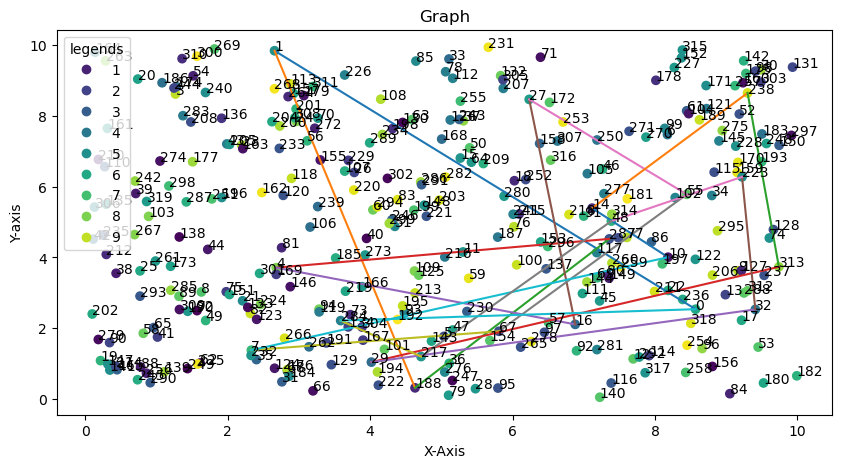

In [4]:
## This is correct. I will implement dp too

import math
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random
import os 
from multiprocessing import Pool


def create_instance(num_points):
    op_dataset = []
    for i in range(num_points):
        a = 3
        b = 2
        c=5
        while a >=b and c > b - a:
            a=random.randint(0,23)
            b=random.randint(0,23)
            c=random.random()*1.5
        if i==0:
            a=0
            b=0
            c=0
        op_dataset.append((random.random()*10,random.random()*10,random.random()*10,a,b,c))             # saving x coordinate , y coordinate , points
    
    return(op_dataset)
                          

def get_data():
    path = "samples/with_time"
    filenames = os.listdir(path)
    print("Already available test files:")
    for filename in filenames:
        print(filename+"\n")
    k = int(input("Which test data do you want? type k , for k = num of points : "))
    file_path = "samples/with_time/test"+str(k)+".tsv"
    data_points =[]
    with open(file_path,"r") as file:
        lines = file.readlines()
        for line in lines:
            xcor,ycor,points,sTime,eTime,exTime = map(float,line.split())
            data_points.append((xcor,ycor,points,sTime,eTime,exTime))
    return(data_points)

def euc_dist(x1,y1,x2,y2):
    dist = np.sqrt((x1-x2)**2 +(y1-y2)**2)
    return(dist)

class Op_basic:
    def __init__(self,num_points,data,constraint_d,constraint_t,speed):
        self.num_points = num_points
        self.data = data
        self.constraint_d = constraint_d
        self.constraint_t = constraint_t
        self.speed = speed
        self.edge_matrix = self.dist_matrix()
        
    def save(self):
        file_path = "samples/with_time/test"+str(self.num_points) +".tsv"
        with open(file_path,"w+") as file:
            for i in range(self.num_points):
                file.write(str(self.data[i][0])+"\t"+str(self.data[i][1])+"\t"+str(self.data[i][2])+"\t"+str(self.data[i][3])+"\t"+str(self.data[i][4])+"\t"+str(self.data[i][5])+"\n")
        print("File Has been written!")
        
    def dist_matrix(self):
        n = self.num_points
        dist_matrix = [[0]*n for _ in range(n)]
        for i in range(n):
            for j in range(i+1,n):
                dist = euc_dist(self.data[i][0],self.data[i][1],self.data[j][0],self.data[j][1])
                dist_matrix[i][j]=dist
                dist_matrix[j][i]= dist
        return(dist_matrix)
    
    def plot(self,path):
        x = []
        y = []
        p = []

        for i in range(self.num_points):
            x.append(float(self.data[i][0]))
            y.append(float(self.data[i][1]))
            p.append(float(self.data[i][2]))

        fig,ax = plt.subplots(figsize=(10,5))
        abc = ax.scatter(x=x,y=y,c=p)
        ax.set(xlabel="X-Axis",ylabel="Y-axis",title="Graph")
        ax.legend(*abc.legend_elements(),title="legends")
        for i in range(self.num_points):
            plt.text(x[i],y[i],str(i))
        for i in range(len(path)-1):
            plt.plot([x[path[i]],x[path[i+1]]],[y[path[i]],y[path[i+1]]])
        plt.plot([x[0],x[path[-1]]],[y[0],y[path[-1]]])
 
    def greedySoln1(self):          # keep distance minimum
        n = self.num_points
        d = self.edge_matrix
        sTimes=[row[3] for row in self.data]
        indices = np.argsort(sTimes)## not taking travel time into consideration now and using HRNN
        self.data=[self.data[i] for i in indices]
        eTimes = [row[4] for row in self.data]
        bTimes=[row[5] for row in self.data]
        sTimes=[row[3] for row in self.data]
        wTime=0
        hrrs=[1 * 1 for _ in range(len(data))]
        tmax = self.constraint_t
        speed = self.speed
        p =[0]
        current_time =0
        dist_covered = 0
        time_consumed =0
        tot_points = self.data[0][2]
        visited =[False] * n
        visited[0]= True
        dmax = self.constraint_d
        for i in range(n):
            print(f"{i}:{self.data[i]}")


        while (dist_covered < dmax) and (time_consumed <tmax):
            dist_left = dmax - dist_covered
            time_left = tmax - time_consumed
            min_d = float('inf')
            max_hrrn = float('-inf')
            min_ind = None
            for i in range(n):
                #print(f"While traversing i:{i}")
                #print(f"not visited[i]:{not visited[i]}")
               # print(f"dist_left >= d[p[-1]][i]:{dist_left >= d[p[-1]][i]}")
               # print(f"bTimes[p[-1]] <= time_left:{bTimes[p[-1]] <= time_left}")
               # print(f"current_time <= sTimes[i]:{current_time <= sTimes[i]}")
               # print(f"current_time+bTimes[i] <= eTimes[i]:{sTimes[i]-current_time+bTimes[i] <= eTimes[i]}")
                if not visited[i] and dist_left >= d[p[-1]][i] and bTimes[p[-1]] <= time_left and current_time+bTimes[i]<=eTimes[i]:
                    if d[p[-1]][i] < min_d:
                            #max_hrrn = response_ratio
                            min_d = d[p[-1]][i]
                            if current_time < sTimes[i]:
                                wTime=sTimes[i] - current_time
                            else:
                                wTime=0
                            current_time = current_time+bTimes[i]+wTime
                            print(current_time)
                            min_ind = i
                            visited[min_ind]=True
                            p.append(min_ind)
                            time_consumed= current_time

            if min_ind is None : 
                break

            dist_covered +=min_d
            tot_points += self.data[min_ind][2]
           # print(f"Points added : {self.data[min_ind][2]}")
            
        print(f"Number of points visited : {len(p)}")
        print(f"Total distance covered is :{dist_covered}")
        print(f"Path is {p}")
        print(f"Total points is: {tot_points}")
        self.plot(p)


if __name__ == "__main__":
    data = get_data()
    op1 = Op_basic(len(data),data,9,100,10)
    startTime = timeit.default_timer()
    op1.greedySoln1()
    stopTime = timeit.default_timer()
    print(f"Total time taken is {stopTime - startTime}")
    
##https://www.geeksforgeeks.org/weighted-job-scheduling/

#### dpSoln Required Will implement!